<a href="https://colab.research.google.com/github/adithyaajith2001/Data-Science-/blob/main/WalmartBuler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Walmart EDA Report

**About Walmart**

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

**Business Problem**

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

**Dataset**

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:

User_ID: User ID
Product_ID: Product ID
Gender: Sex of User
Age: Age in bins
Occupation: Occupation(Masked)
City_Category: Category of the City (A,B,C)
StayInCurrentCityYears: Number of years stay in current city
Marital_Status: Marital Status
ProductCategory: Product Category (Masked)
Purchase: Purchase Amount


# Problem Statement:Purchase behaviour of customers based on the gender,marital status,age,occupation,location



1.   Are women spending more money per transaction than men? Why or Why not?
2.   Confidence intervals and distribution of the mean of the expenses by female and male customers
3.   Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?
4.   Results when the same activity is performed for Married vs Unmarried
5.   Results when the same activity is performed for Age






In [ ]:
#importing librarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
#uploading the dataset
from google.colab import files
uploaded = files.upload()

Saving walmart_data.csv to walmart_data.csv


In [ ]:
#to read the file
df=pd.read_csv('/content/walmart_data.csv')

# BASIC ANALYSIS

In [ ]:
#first 5 rows
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


Inconsistency in the data : Age 55+(not in range),stay_in _current city_years 4+(non numerical)


In [ ]:
df.shape


(550068, 10)

550068 rows and 10 features

In [ ]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


Datatype:
5 Objects and 5 integers

In [ ]:
df.dtypes

,0
User_ID,int64
Product_ID,object
Gender,object
Age,object
Occupation,int64
City_Category,object
Stay_In_Current_City_Years,object
Marital_Status,int64
Product_Category,int64
Purchase,int64


Numerical features:
5 nos. [User_Id,Purchase,Product_category,marital_status,occupation]
Categorical features:
5nos.[Product_id,Gender,Age,City_category,Stay_in_Current_City]


# CONVERSION TO CATEGORY

In [ ]:
conversion_to_category=['Product_ID','Gender','Age','City_Category','Stay_In_Current_City_Years']

In [ ]:
#replacing the value 4+ with 4
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace('4+', 4).astype(int)


In [ ]:
#To convert the object datatype to category
for column in conversion_to_category:
  df[column]=df[column].astype('category')

In [ ]:
df.dtypes

,0
User_ID,int64
Product_ID,category
Gender,category
Age,category
Occupation,int64
City_Category,category
Stay_In_Current_City_Years,category
Marital_Status,int64
Product_Category,int64
Purchase,int64


# NON GRAPHICAL ANALYSIS

---



In [ ]:
#To identify the frequency of unique values
features=['User_ID','Product_ID','Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category','Purchase']
for column in features:
  print(df.value_counts(column))


User_ID
1001680    1026
1004277     979
1001941     898
1001181     862
1000889     823
           ... 
1002111       7
1005391       7
1002690       7
1005608       7
1000708       6
Name: count, Length: 5891, dtype: int64
Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00068742       1
P00012342       1
P00162742       1
P00091742       1
P00231642       1
Name: count, Length: 3631, dtype: int64
Gender
M    414259
F    135809
Name: count, dtype: int64
Age
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: count, dtype: int64
Occupation
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: count, dtype: int64
City_Category
B    231173
C    171175
A

In [ ]:
#To find the unique values of a series
features=['User_ID','Product_ID','Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category','Purchase']
for column in features:
      print(df[column].unique())



[1000001 1000002 1000003 ... 1004113 1005391 1001529]
['P00069042', 'P00248942', 'P00087842', 'P00085442', 'P00285442', ..., 'P00375436', 'P00372445', 'P00370293', 'P00371644', 'P00370853']
Length: 3631
Categories (3631, object): ['P00000142', 'P00000242', 'P00000342', 'P00000442', ..., 'P0099642',
                            'P0099742', 'P0099842', 'P0099942']
['F', 'M']
Categories (2, object): ['F', 'M']
['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
Categories (7, object): ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']
[10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
['A', 'C', 'B']
Categories (3, object): ['A', 'B', 'C']
[2, 4, 3, 1, 0]
Categories (5, int64): [0, 1, 2, 3, 4]
[0 1]
[ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
[ 8370 15200  1422 ...   135   123   613]


**Unique Values**

Stay_In_Current_City_years:  [0, 1, 2, 3, 4]

City_Category :   ['A', 'B', 'C']

Age :      ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

Product_Id:    ['P00000142', 'P00000242', 'P00000342', 'P00000442', ..., 'P0099642',                         'P0099742', 'P0099842', 'P0099942'] //3631 values

Gender:  ['F', 'M']

Marital_Status : [0 1]

Product_Category: [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]



In [ ]:
#finding the count of unique values
features=['User_ID','Product_ID','Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category','Purchase']
for column in features:
      print(df[column].nunique())

5891
3631
2
7
21
3
5
2
20
18105


**The Number of Unique Values in Each column**

User_ID: 5891

Product_ID:3631

Gender:2

Age: 7

Occupation: 21

City_Category: 3

Stay_In_Current_City_Years: 5

Marital_Status: 2

Product_Category: 20

Purchase: 18105


In [ ]:
#to find the null values
df.isna()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
550063,False,False,False,False,False,False,False,False,False,False
550064,False,False,False,False,False,False,False,False,False,False
550065,False,False,False,False,False,False,False,False,False,False
550066,False,False,False,False,False,False,False,False,False,False


In [ ]:
#to find the sum of null values
df.isna().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


In [ ]:
#to find the percentage of null values in the dataset
 (df.isna().sum()/len(df))*100

,0
User_ID,0.0
Product_ID,0.0
Gender,0.0
Age,0.0
Occupation,0.0
City_Category,0.0
Stay_In_Current_City_Years,0.0
Marital_Status,0.0
Product_Category,0.0
Purchase,0.0


Null Values : 0

In [ ]:
# to get the statistical summary
df.describe()

,User_ID,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,1.858418,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,1.289443,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,1.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,2.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,3.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,4.000000,1.000000,20.000000,23961.000000


Mean of Purchase amount :550068
Range of Purchase Amount : 12 - 23961

In [ ]:
# To find the duplicated values
df.duplicated().value_counts()

,count
False,550068


No duplicate values detected

In [ ]:
#listing the category values
category=['Product_ID','Gender','Age','City_Category','Stay_In_Current_City_Years']

In [ ]:
#To get the statistical summary of categorical values
df.describe(include='category')

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


**Basic Statistical Summary**

Mean Value of Purchase : 9264

Range of Purchase Amount : 12 - 23961

Frequently Purchased Product : P00265242

Frequent Purchase By : Male

Frequent Purchase By Age Range :26-35

Frequent Purchase BY City Category : B


In [ ]:
#To find the unique user id
df['User_ID'].nunique()

5891

The Number of Unique Customers :  5891

In [ ]:
#to identify the male and female users
df['Gender'].value_counts()

,count
Gender,
M,414259
F,135809


**The Number of Transactions made By**

Male: 414259 ie, 75%

Female: 135809 ie, 25%


In [ ]:
#to find the percentage of male and female users
gender_counts = df['Gender'].value_counts()
gender_percentages = gender_counts / len(df) * 100
print(gender_percentages)

Gender
M    75.310507
F    24.689493
Name: count, dtype: float64


The Number of Transactions made By

Male: 414259 ie, 75%

Female: 135809 ie, 25%


In [ ]:
product_count = df['Product_Category'].value_counts()
product_percentages = product_count / len(df) * 100
print(product_percentages)

Product_Category
5     27.438971
1     25.520118
8     20.711076
11     4.415272
2      4.338373
6      3.720631
3      3.674637
4      2.136645
16     1.786688
15     1.143495
13     1.008784
10     0.931703
12     0.717548
7      0.676462
18     0.568112
20     0.463579
19     0.291419
14     0.276875
17     0.105078
9      0.074536
Name: count, dtype: float64


The highest Transactions made for the product category:5,1,8,11,2



# VISUAL ANALYSIS





# UNIVARIATE

<ipython-input-24-f536c74f28db>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Purchase'], kde=True)


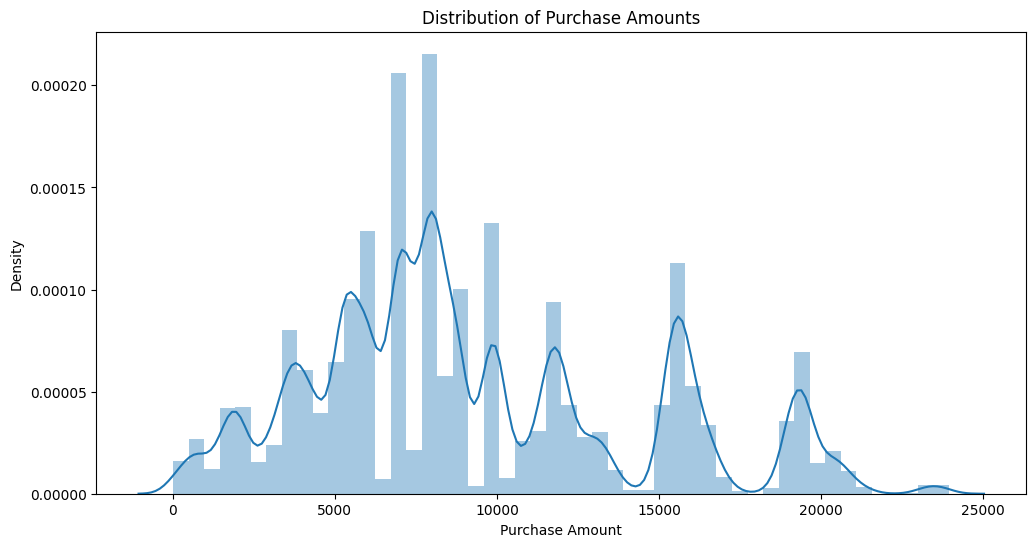

In [ ]:
#Plotting the distribution graph for Purchase amount against density
plt.figure(figsize=(12, 6))
sns.distplot(df['Purchase'], kde=True)
plt.title('Distribution of Purchase Amounts')
plt.xlabel('Purchase Amount')
plt.ylabel('Density')
plt.show()


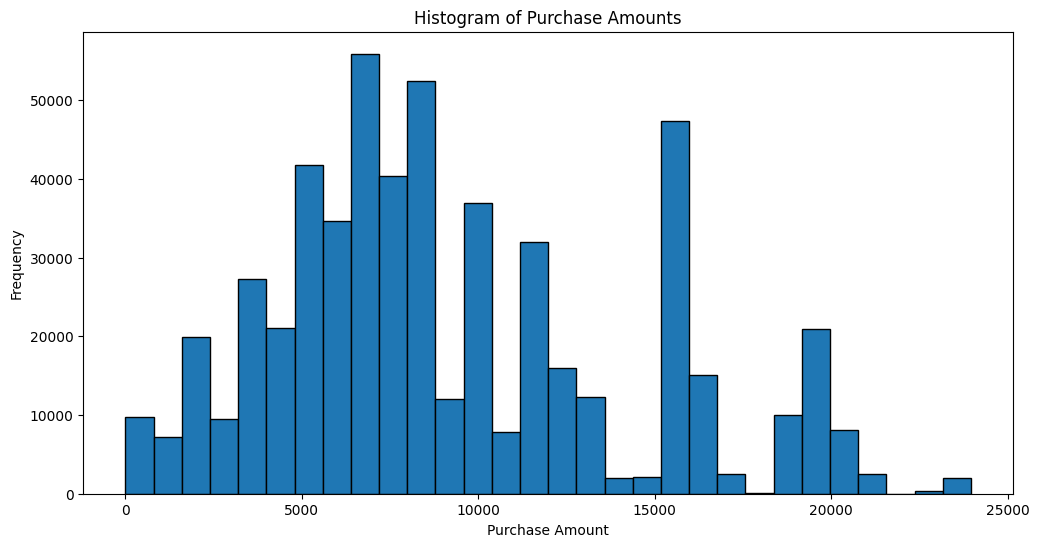

In [ ]:
#Plotting Histogram for Purchase amount against Frequency
plt.figure(figsize=(12, 6))
plt.hist(df['Purchase'], bins=30, edgecolor='k')
plt.title('Histogram of Purchase Amounts')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()


**The highest frequency of purchase amount falls in the range of 5000-1000**

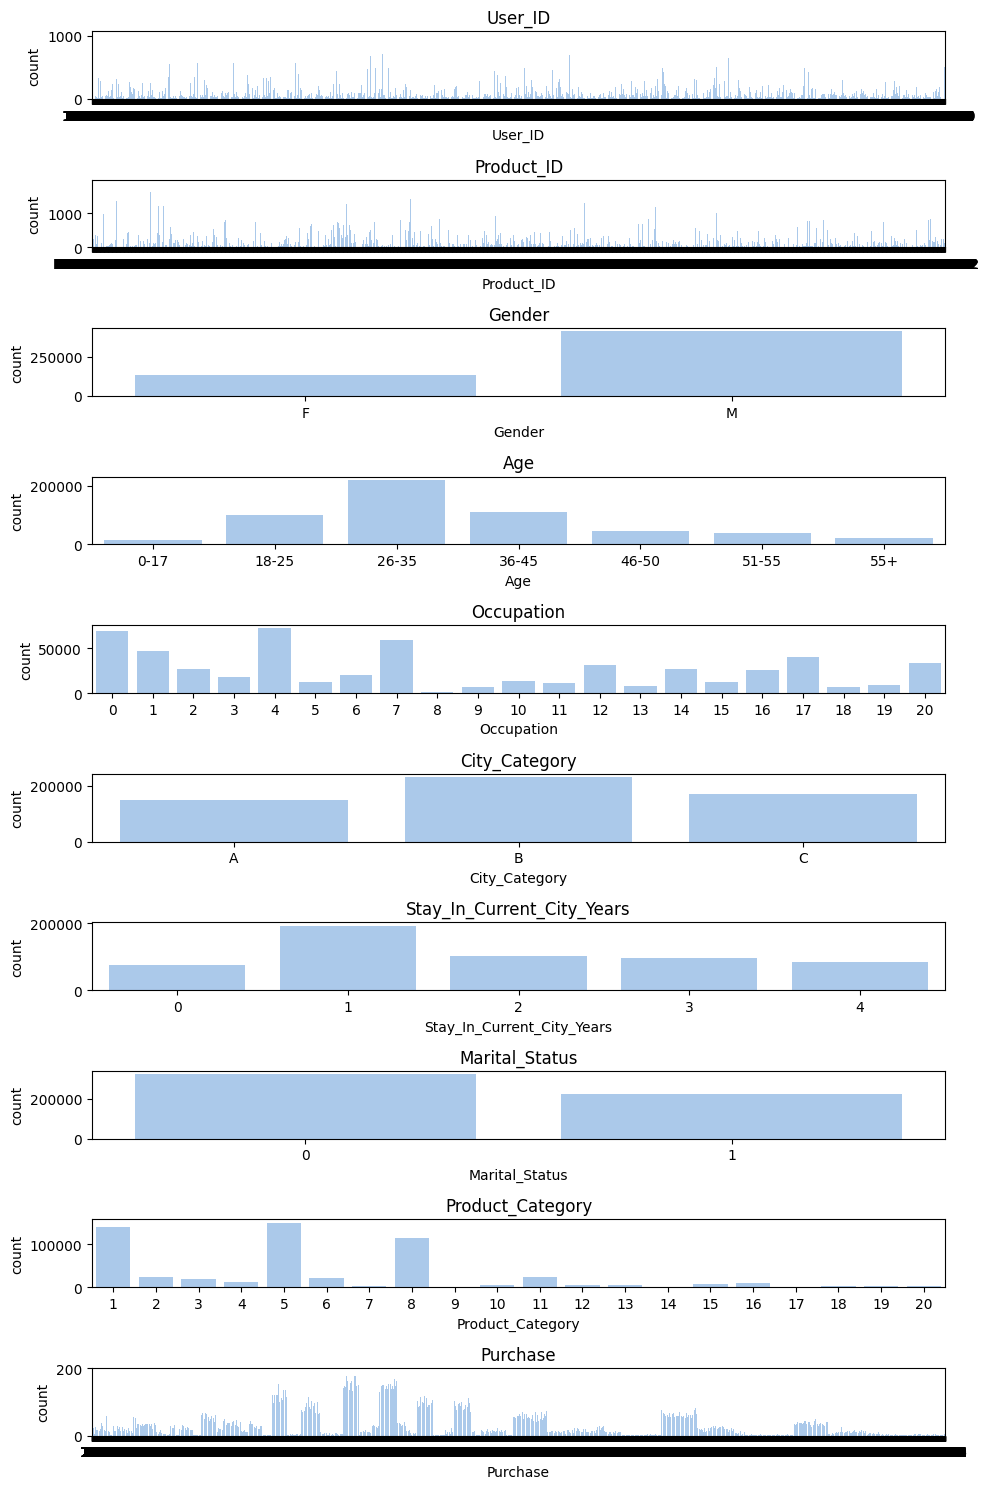

In [ ]:
categorical_columns =['User_ID','Product_ID','Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category','Purchase']

sns.set_palette("pastel")  # Set color palette

# Adjust figure size for vertical layout
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(10, 15))  # Adjust as needed

# Create countplots for each categorical column
for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, data=df, ax=axes[i])
    axes[i].set_title(column)

# Adjust spacing between subplots (optional)
plt.tight_layout()

plt.show()

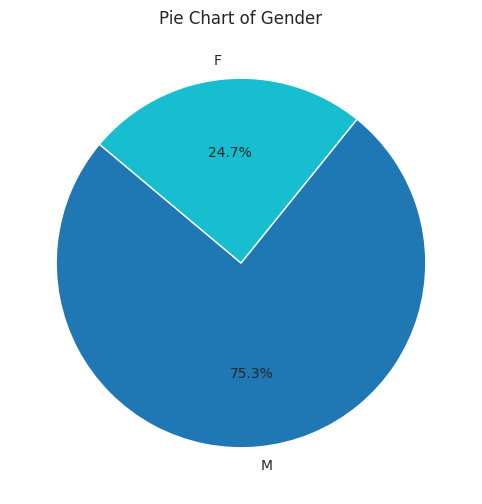

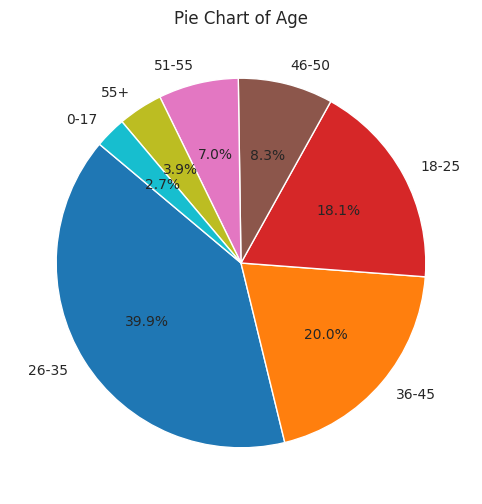

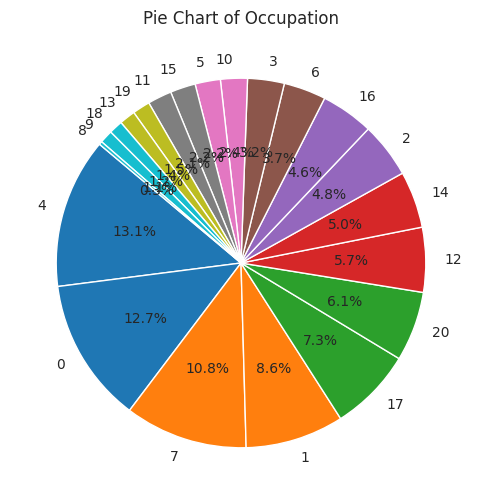

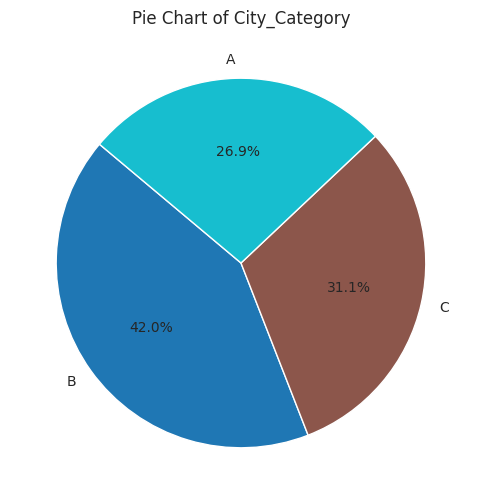

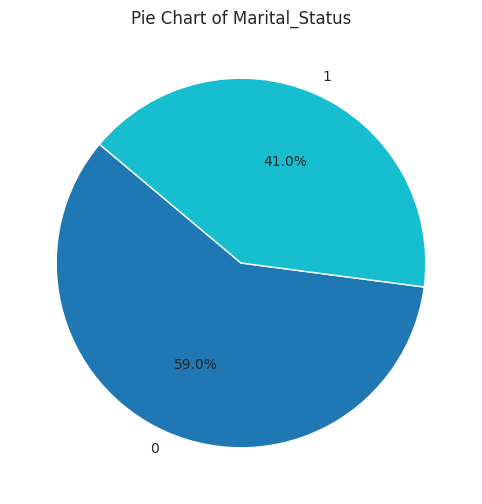

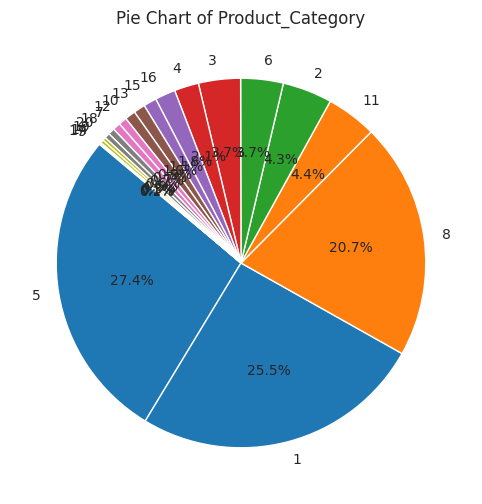

In [ ]:
categorical_columns = ['Gender', 'Age', 'Occupation', 'City_Category',
                       'Marital_Status', 'Product_Category']
#plotting pie chart for the distribution of Marital Status
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    df[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, cmap='tab10')
    plt.title(f'Pie Chart of {column}')
    plt.ylabel('')  # Hide the y-label
    plt.show()

Majority Male Users

Prominent Age group 26-35 followed by 36-45 and 18-25

Prominent Occupation  4,0,7,1

Highest number of users from city category B

Unmarried users are more in the dataset than Married

Prominent Product Category is 5,1,8


# BIVARIATE

**BoxPlot**

Text(0, 0.5, 'Purchase Amount')

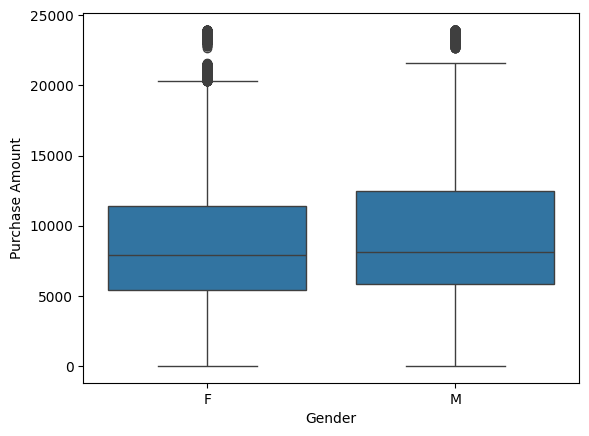

In [ ]:
#plotting boxlot for the distribution of gender against purchase amount
sns.boxplot(x='Gender',y='Purchase',data=df)
plt.xlabel('Gender')
plt.ylabel('Purchase Amount')

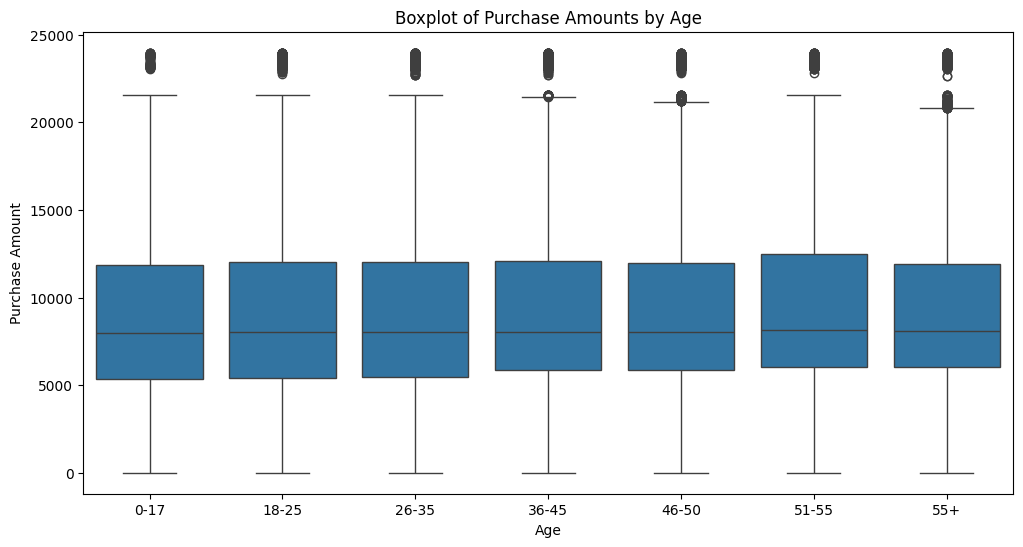

In [ ]:
#plotting boxlot of Purchase amount by age

plt.figure(figsize=(12, 6))
sns.boxplot(x='Age', y='Purchase', data=df)
plt.title('Boxplot of Purchase Amounts by Age')
plt.xlabel('Age')
plt.ylabel('Purchase Amount')
plt.show()

Text(0, 0.5, 'Purchase Amount')

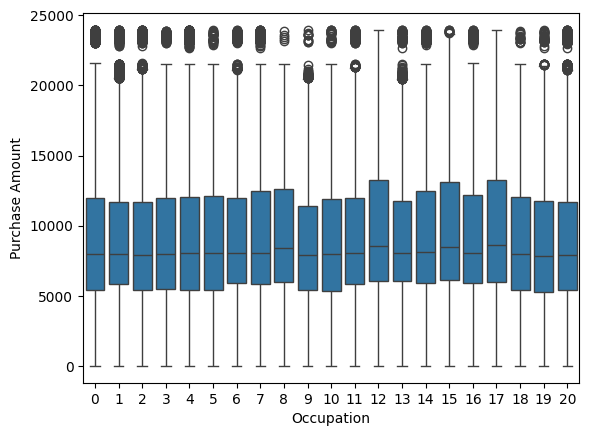

In [ ]:
#plotting boxlot of Purchase amount by occupation
sns.boxplot(x='Occupation',y='Purchase',data=df)
plt.xlabel('Occupation')
plt.ylabel('Purchase Amount')

Text(0, 0.5, 'Purchase Amount')

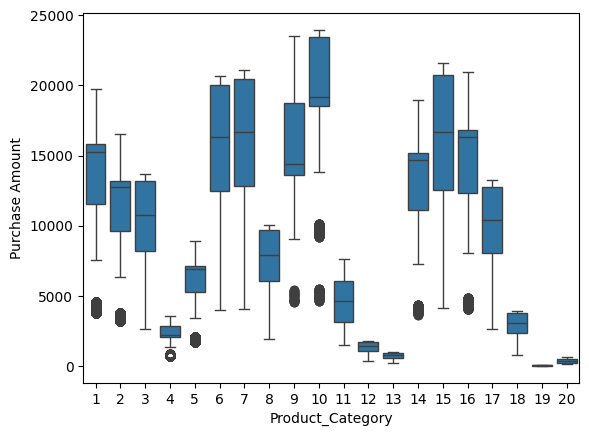

In [ ]:
#plotting boxlot of Purchase amount by product Category

sns.boxplot(x='Product_Category',y='Purchase',data=df)
plt.xlabel('Product_Category')
plt.ylabel('Purchase Amount')

Text(0, 0.5, 'Purchase Amount')

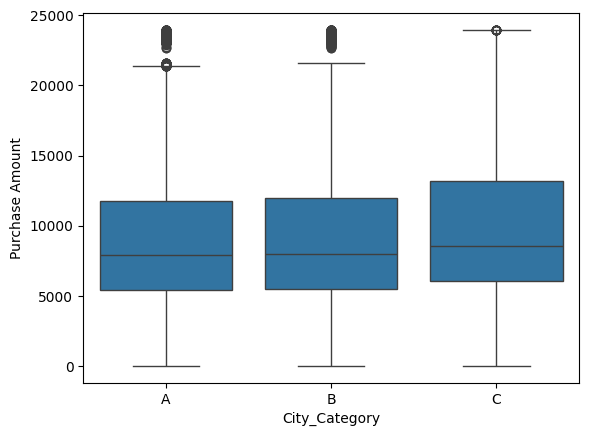

In [ ]:
#plotting boxlot of Purchase amount by city_category

sns.boxplot(x='City_Category',y='Purchase',data=df)
plt.xlabel('City_Category')
plt.ylabel('Purchase Amount')

Text(0, 0.5, 'Purchase Amount')

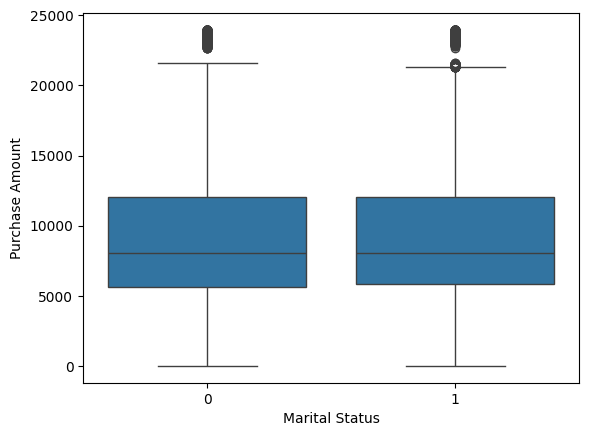

In [ ]:
#plotting boxlot of Purchase amount by Marital_Status

sns.boxplot(x='Marital_Status',y='Purchase',data=df)
plt.xlabel('Marital Status')
plt.ylabel('Purchase Amount')

Text(0, 0.5, 'Purchase Amount')

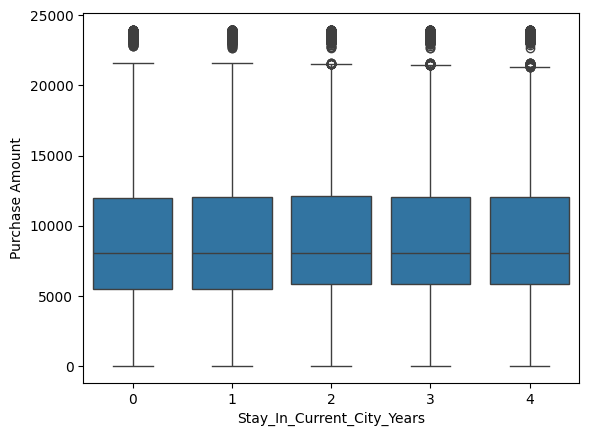

In [ ]:
#plotting boxlot of Purchase amount by stay in current city years

sns.boxplot(x='Stay_In_Current_City_Years',y='Purchase',data=df)
plt.xlabel('Stay_In_Current_City_Years')
plt.ylabel('Purchase Amount')

**CountPlot**

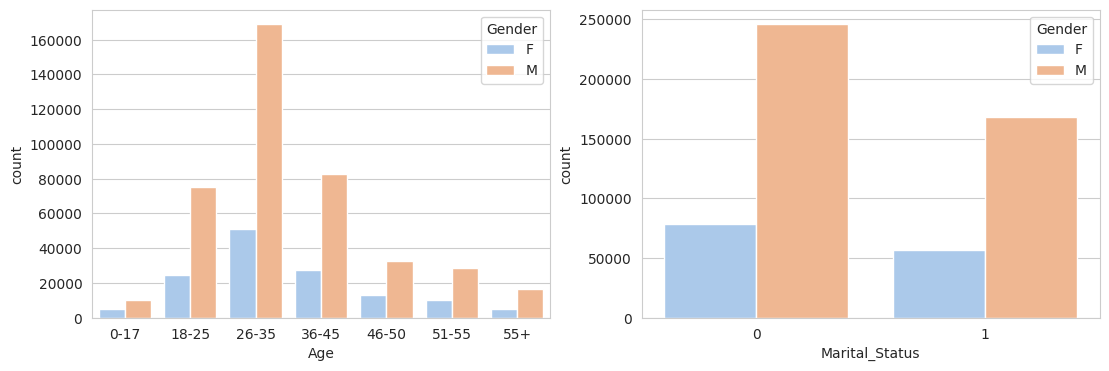

In [ ]:
#plotting countplot of  age and marital status

plt.subplots(1,2,figsize=(13,4))
fig.suptitle("Gender distribution on age and marital_status")
plt.subplot(1,2,1)
sns.countplot(data=df,x="Age",hue="Gender")
plt.subplot(1,2,2)
sns.countplot(data=df,x="Marital_Status",hue="Gender")
plt.show()

More male users in the age group 26-35,36-45 ad 18-25

Male users are more in both married and unmarried population in the dataset


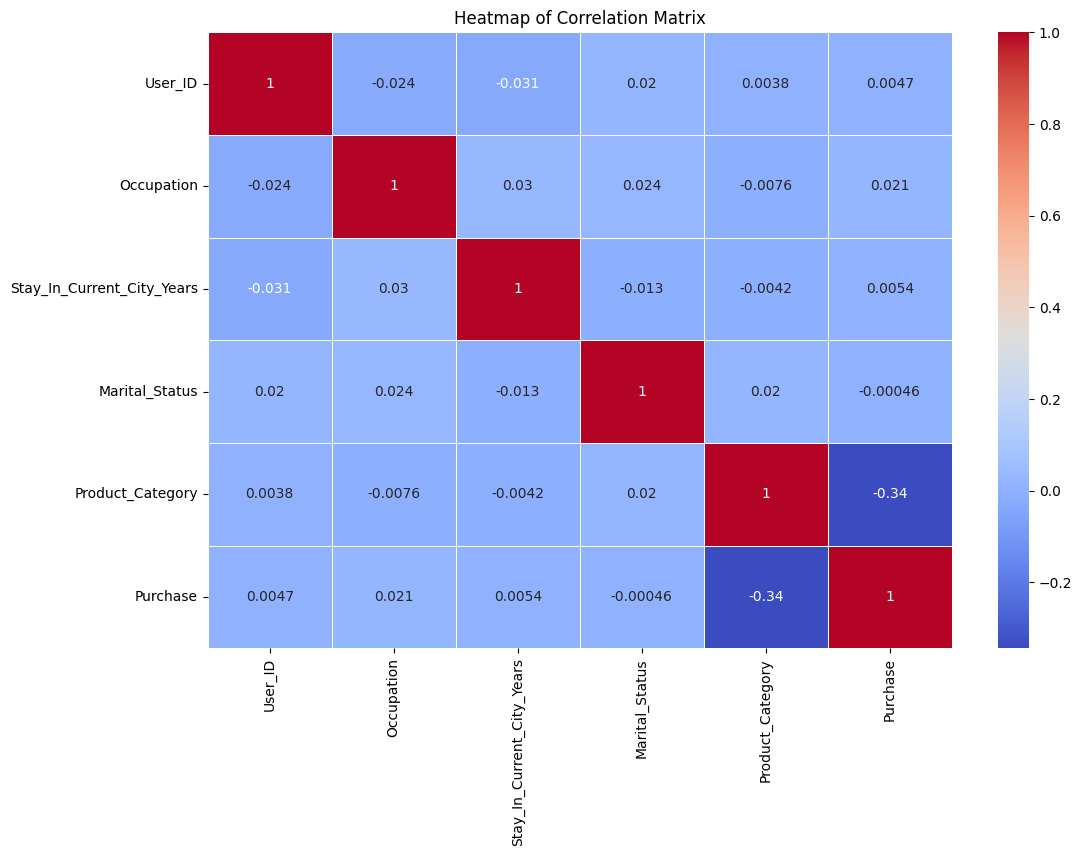

In [ ]:
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Compute the correlation matrix using only numeric columns
corr_matrix = df[numeric_columns].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

**Correlations**

There exist no strong correlation between the features

# Are women spending more money per transaction than men? Why or Why not?

In [ ]:
#to identify the null values in feature purchase and gender
print(df[['Purchase', 'Gender']].isnull().sum())


Purchase    0
Gender      0
dtype: int64


In [ ]:
#to find the average spend on purchase by gender
avg_purchase_by_gender = df.groupby('Gender')['Purchase'].mean().reset_index()

print("Average Purchase by Gender:")
print(avg_purchase_by_gender)


Average Purchase by Gender:
  Gender     Purchase
0      F  8734.565765
1      M  9437.526040


<ipython-input-72-21780bc761cf>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_purchase_by_gender = df.groupby('Gender')['Purchase'].mean().reset_index()


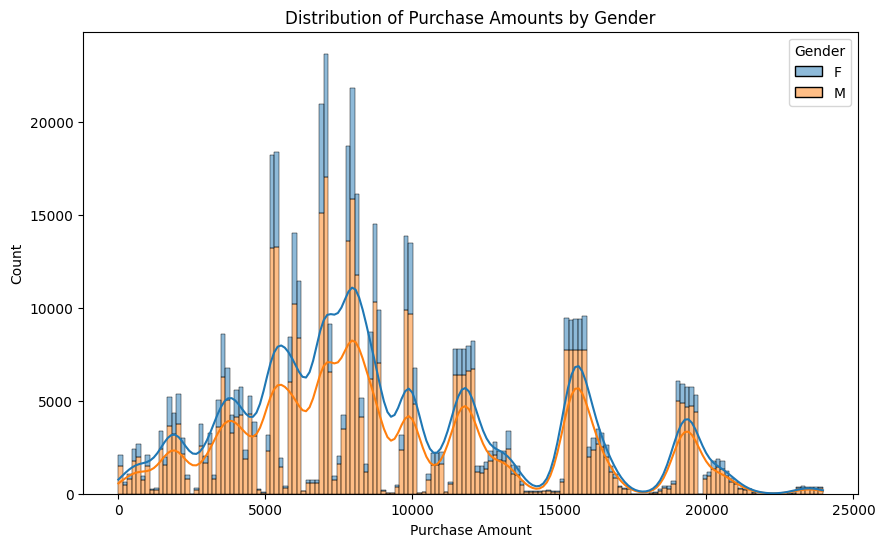

In [ ]:
#plotting stack histogram of Purchase amount by age against count

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Purchase', hue='Gender', multiple='stack', kde=True)
plt.xlabel('Purchase Amount')
plt.title('Distribution of Purchase Amounts by Gender')
plt.show()


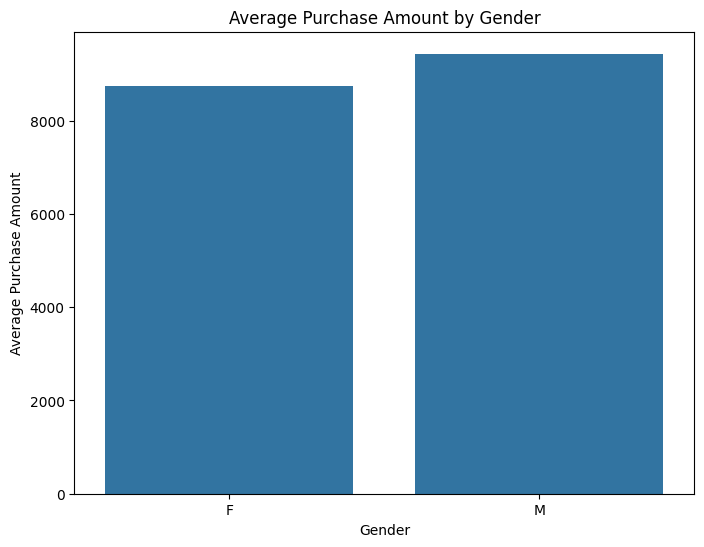

In [ ]:
#plotting histogram of average purchase amount by gender

plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Purchase', data=avg_purchase_by_gender)
plt.title('Average Purchase Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Purchase Amount')
plt.show()


The average purchase Amount per transaction per gender

Female is 8735

Male is 9438

From the above findings Women are not spending more money per transaction than men



<ipython-input-45-3ec4d808cb11>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_purchase_by_gender_and_category = df.groupby(['Gender', 'Product_Category'])['Purchase'].mean().reset_index()


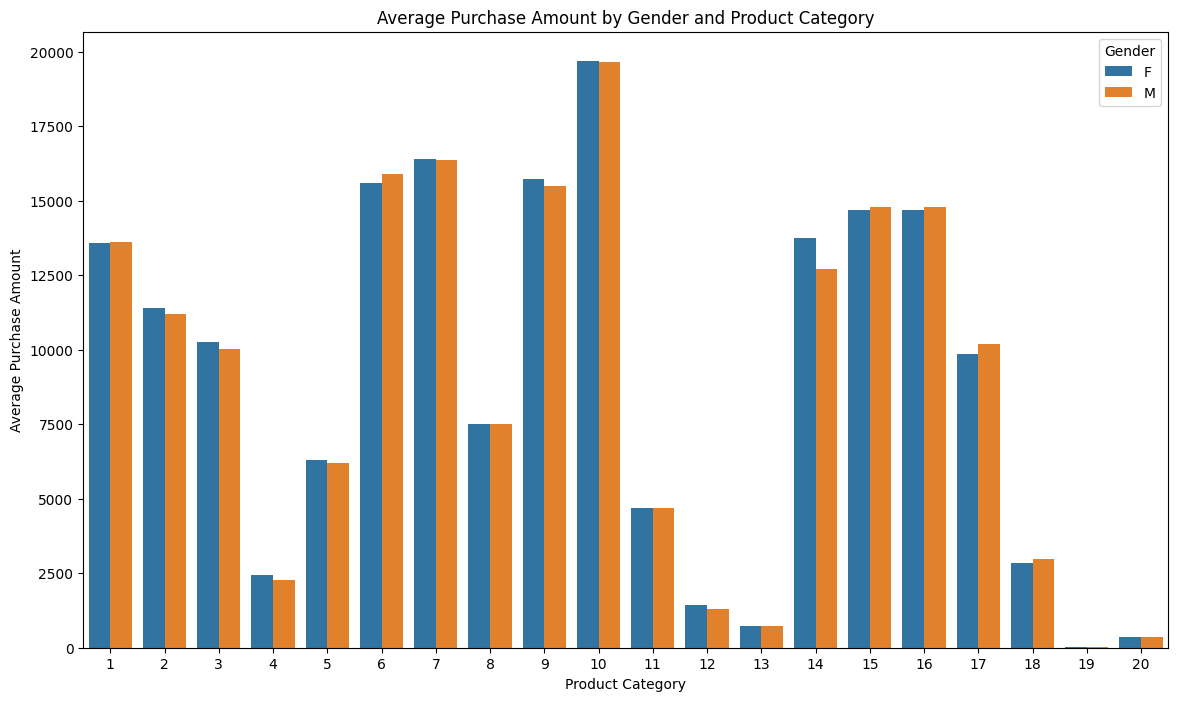

In [ ]:
#plotting barplot to depict the average purchase amount by gender and product category

avg_purchase_by_gender_and_category = df.groupby(['Gender', 'Product_Category'])['Purchase'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(x='Product_Category', y='Purchase', hue='Gender', data=avg_purchase_by_gender_and_category)
plt.title('Average Purchase Amount by Gender and Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Purchase Amount')
plt.legend(title='Gender')
plt.show()

 Histogram shows whether men tend to make larger purchases more frequently than women.

**Reason**

The data set has 75% Male Population and 25% Female Populaiton.

Since the Size of sample has higher difference higher the chance for higher average among male population.

In the product categories male customers make more purchases than female customers


# Are Married spending more money per transaction than Unmarried? Why or Why not?

In [ ]:
#to find the null values in the feature purcfhase and marital status
print(df[['Purchase', 'Marital_Status']].isnull().sum())


Purchase          0
Marital_Status    0
dtype: int64


In [ ]:
#to find the average amount spend based on the marital stuts
avg_purchase_by_gender = df.groupby('Marital_Status')['Purchase'].mean().reset_index()

print("Average Purchase by Marital_Status:")
print(avg_purchase_by_gender)


Average Purchase by Marital_Status:
   Marital_Status     Purchase
0               0  9265.907619
1               1  9261.174574


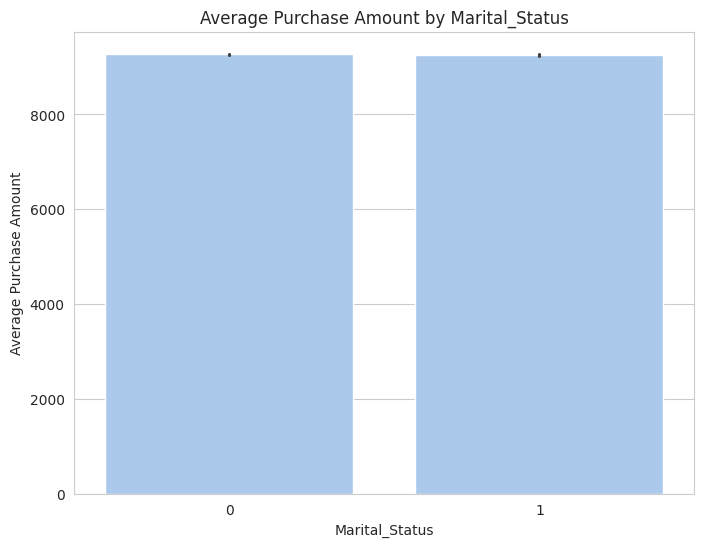

In [ ]:
#plotting barplot based on the average purchase amount spend by marital status

plt.figure(figsize=(8, 6))
sns.barplot(x='Marital_Status', y='Purchase', data=df)
plt.title('Average Purchase Amount by Marital_Status')
plt.xlabel('Marital_Status')
plt.ylabel('Average Purchase Amount')
plt.show()


# Are youngers spending more money per transaction than olders? Why or Why not?

In [ ]:
#to identify the null values in the features purchase and age
print(df[['Purchase', 'Age']].isnull().sum())


Purchase    0
Age         0
dtype: int64


In [ ]:
#to find the average amount spend  based on age
avg_purchase_by_gender = df.groupby('Age')['Purchase'].mean().reset_index()

print("Average Purchase by Age:")
print(avg_purchase_by_gender)


Average Purchase by Age:
     Age     Purchase
0   0-17  8933.464640
1  18-25  9169.663606
2  26-35  9252.690633
3  36-45  9331.350695
4  46-50  9208.625697
5  51-55  9534.808031
6    55+  9336.280459


<ipython-input-76-743b77e13869>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_purchase_by_gender = df.groupby('Age')['Purchase'].mean().reset_index()


In [ ]:
avg_purchase_by_age = df.groupby('Age')['Purchase'].mean().reset_index()

print("Average Purchase by Age:")
print(avg_purchase_by_age)


Average Purchase by Age:
     Age     Purchase
0   0-17  8933.464640
1  18-25  9169.663606
2  26-35  9252.690633
3  36-45  9331.350695
4  46-50  9208.625697
5  51-55  9534.808031
6    55+  9336.280459


<ipython-input-91-e6516ae8b0f1>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_purchase_by_age = df.groupby('Age')['Purchase'].mean().reset_index()


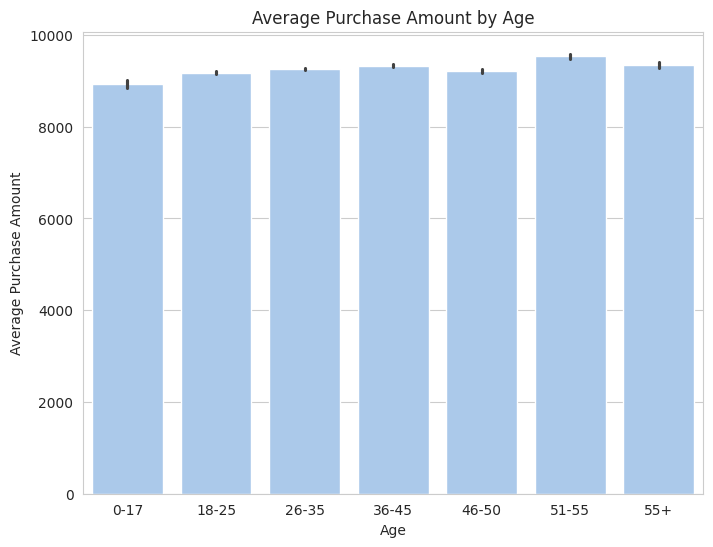

In [ ]:
#plotting barplot of Average Purchase amount by age

plt.figure(figsize=(8, 6))
sns.barplot(x='Age', y='Purchase', data=df)
plt.title('Average Purchase Amount by Age')
plt.xlabel('Age')
plt.ylabel('Average Purchase Amount')
plt.show()


# Confidence intervals and distribution of the mean of the expenses by female and male customers

In [ ]:
# Select the 'Purchase' column for rows where the 'Gender' column is 'M' (Male)
male_expenses = df[df['Gender'] == 'M']['Purchase']

# Select the 'Purchase' column for rows where the 'Gender' column is 'F' (Female)
female_expenses = df[df['Gender'] == 'F']['Purchase']

# Calculate the mean (average) of male purchase expenses
male_mean = male_expenses.mean()

# Calculate the mean (average) of female purchase expenses
female_mean = female_expenses.mean()

# Calculate the standard deviation of male purchase expenses, which measures the variation or dispersion of the data
male_std = male_expenses.std()

# Calculate the standard deviation of female purchase expenses, which measures the variation or dispersion of the data
female_std = female_expenses.std()

# Print the calculated mean and standard deviation for male and female expenses
print(f"Male Mean: {male_mean}, Male Std Dev: {male_std}")
print(f"Female Mean: {female_mean}, Female Std Dev: {female_std}")


Male Mean: 9437.526040472265, Male Std Dev: 5092.18620977797
Female Mean: 8734.565765155476, Female Std Dev: 4767.233289291458


In [ ]:
male_mean = male_expenses.mean()
female_mean = female_expenses.mean()

male_std = male_expenses.std()
female_std = female_expenses.std()

n_male = len(male_expenses)
n_female = len(female_expenses)


z = 1.96

# Calculate the confidence intervals for male customers
male_ci_lower = male_mean - z * (male_std / np.sqrt(n_male))
male_ci_upper = male_mean + z * (male_std / np.sqrt(n_male))

# Calculate the confidence intervals for female customers
female_ci_lower = female_mean - z * (female_std / np.sqrt(n_female))
female_ci_upper = female_mean + z * (female_std / np.sqrt(n_female))

# Print the confidence intervals for reference
print(f"Male 95% CI: [{male_ci_lower}, {male_ci_upper}]")
print(f"Female 95% CI: [{female_ci_lower}, {female_ci_upper}]")

Male 95% CI: [9422.019162420047, 9453.032918524483]
Female 95% CI: [8709.211081242413, 8759.920449068539]


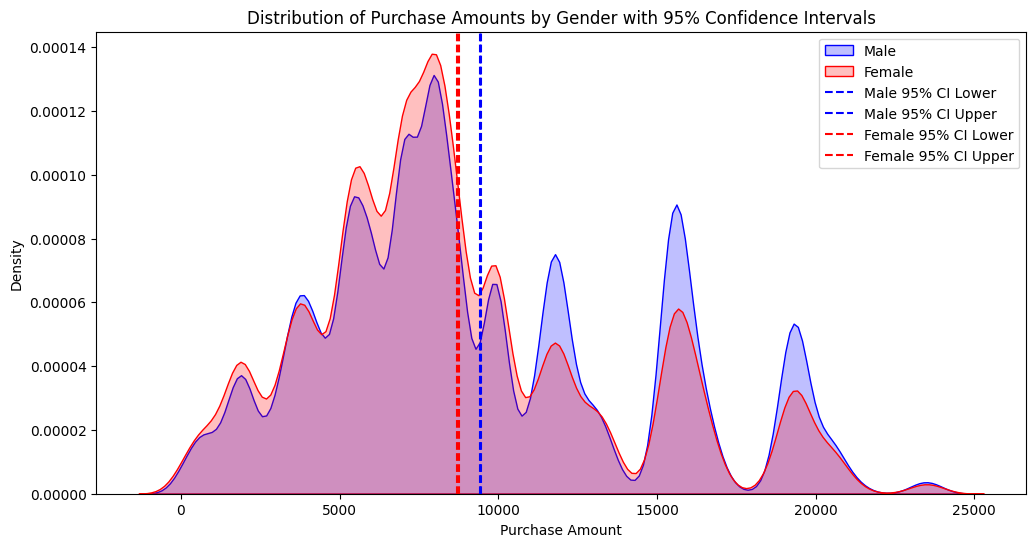

In [ ]:

# Plot the distribution of purchase amounts for male and female customers
plt.figure(figsize=(12, 6))

# Distribution plots for male and female purchase amounts
sns.kdeplot(male_expenses, label='Male', fill=True, color='blue')
sns.kdeplot(female_expenses, label='Female', fill=True, color='red')

# Plot the confidence intervals for males
plt.axvline(male_ci_lower, color='blue', linestyle='--', label='Male 95% CI Lower')
plt.axvline(male_ci_upper, color='blue', linestyle='--', label='Male 95% CI Upper')

# Plot the confidence intervals for females
plt.axvline(female_ci_lower, color='red', linestyle='--', label='Female 95% CI Lower')
plt.axvline(female_ci_upper, color='red', linestyle='--', label='Female 95% CI Upper')

# Adding title and labels
plt.title('Distribution of Purchase Amounts by Gender with 95% Confidence Intervals')
plt.xlabel('Purchase Amount')
plt.ylabel('Density')

# Displaying the legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
def confidence_interval(data,ci):
    #Converting the list to series
    lower_ci = (100-ci)/2
    upper_ci = (100+ci)/2

    #Calculating lower limit and upper limit of confidence interval
    interval = np.percentile(data,[lower_ci,upper_ci]).round(0)

    return interval
def plot(ci):

    #setting the plot style
    fig = plt.figure(figsize = (15,8))
    gs = fig.add_gridspec(2,2)

    #creating separate data frames for each gender
    walmart_data_male = df.loc[df['Gender'] == 'M','Purchase']
    walmart_data_female = df.loc[df['Gender'] == 'F','Purchase']

    #sample sizes and corresponding plot positions
    sample_sizes = [(300,0,0),(1000,0,1),(3000,1,0),(30000,1,1)]

    #number of samples to be taken from purchase amount
    bootstrap_samples = 20000

    male_samples = {}
    female_samples = {}

    # In each iteration of the loop, "i", "x", "y" will hold the "sample size", "row position", "column position" respectively for plotting purposes
    # This allows iterate over different sample sizes and correspondingly place the resulting plots in different positions within a grid of subplots
    for i,x,y in sample_sizes:
        male_means = [] #list for collecting the means of male sample
        female_means = [] #list for collecting the means of female sample

        for j in range(bootstrap_samples):
            #creating random 5000 samples of i (sample size)
            male_bootstrapped_samples = np.random.choice(walmart_data_male,size = i)
            female_bootstrapped_samples = np.random.choice(walmart_data_female,size = i)

            #calculating mean of those samples
            male_sample_mean = np.mean(male_bootstrapped_samples)
            female_sample_mean = np.mean(female_bootstrapped_samples)

            #appending the mean to the list
            male_means.append(male_sample_mean)
            female_means.append(female_sample_mean)

        #storing the above sample generated
        male_samples[f'{ci}%_{i}'] = male_means
        female_samples[f'{ci}%_{i}'] = female_means

        #creating a temporary dataframe for creating kdeplot
        temp_walmart_data = pd.DataFrame(data = {'male_means':male_means,'female_means':female_means})

                                                        #plotting kdeplots
        #plot position
        ax = fig.add_subplot(gs[x,y])

        #plots for male and female
        sns.kdeplot(data = temp_walmart_data,x = 'male_means',color ="#3A7089" ,fill = True, alpha = 0.5,ax = ax,label = 'Male')
        sns.kdeplot(data = temp_walmart_data,x = 'female_means',color ="#4b4b4c" ,fill = True, alpha = 0.5,ax = ax,label = 'Female')

        #calculating confidence intervals for given confidence level(ci)
        m_range = confidence_interval(male_means,ci)
        f_range = confidence_interval(female_means,ci)

        #plotting confidence interval on the distribution
        for k in m_range:
            ax.axvline(x = k,ymax = 0.9, color ="#DDA0DD",linestyle = '--')

        for k in f_range:
            ax.axvline(x = k,ymax = 0.9, color ="#4b4b4c",linestyle = '--')


        #removing the axis lines
        for axislines in ['top','left','right']:
            ax.spines[axislines].set_visible(False)

        # adjusting axis labels
        ax.set_yticks([])
        ax.set_ylabel('')
        ax.set_xlabel('')

        #setting title for visual
        ax.set_title(f'CLT Curve for Sample Size = {i}',{'font':'serif', 'size':11,'weight':'bold'})

        plt.legend()

    #setting title for visual
    fig.suptitle(f'{ci}% Confidence Interval',font = 'serif', size = 18, weight = 'bold')

    plt.show()

    return male_samples,female_samples


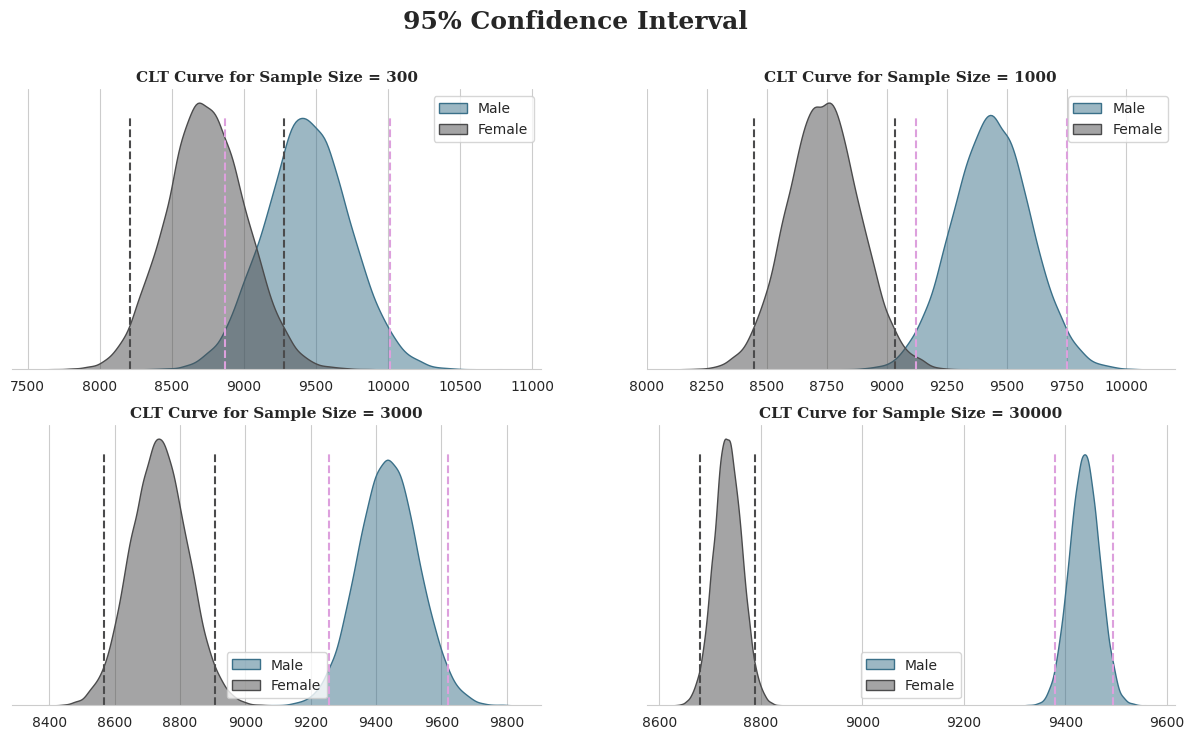

In [ ]:
m_samp_95,f_samp_95 = plot(95)


The data set has 75% Male Population and 25% Female Populaiton.

Since the Size of sample has higher difference higher the chance for higher average among male population.

In the product categories male customers make more purchases than female customers


Increase in Sample size decreases the confidence interval giving more precise informations.

There exist no overlapping in the sample size 3000 and 30000 depicting differences in the mean spending

The peak for male population is higher signifying the higher transaction than female


**Are confidence intervals of average male and female spending overlapping?**

The confidence interval overlapped in sample size 300 and 1000.

With increase in sample size there is no overlapping .

Absence of overlapping depicts difference in spending pattern among the gender.





**How can Walmart leverage this conclusion to make changes or improvements?**

Target the female customers by upgrading the specific products and also highlight the products in stock,

To increase and maintain purchase by male , provide discounts based on the frequency of their visits


# Confidence Interval Construction: Estimating Average Purchase Amount per Transaction by Marital Status

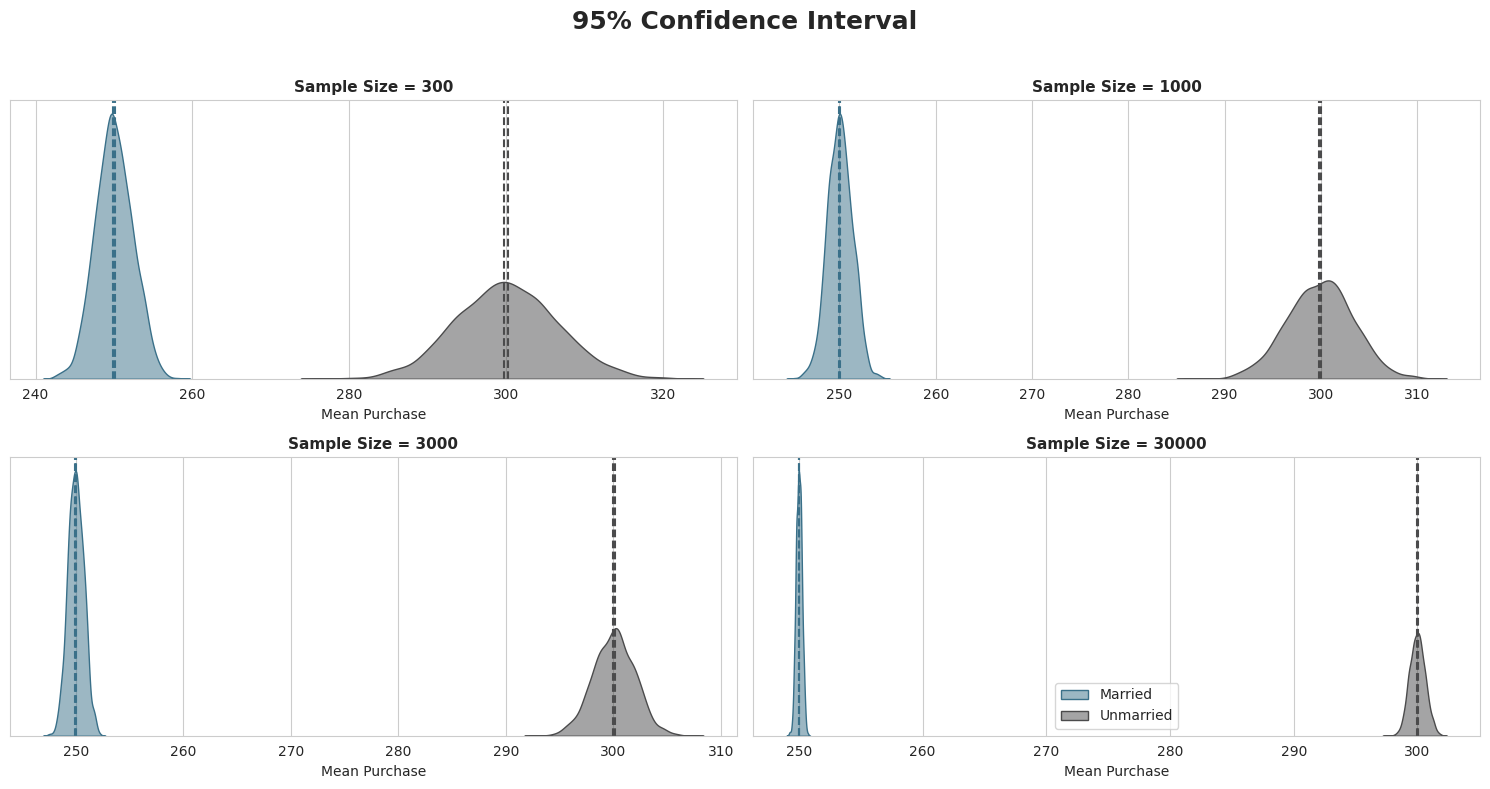

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Sample DataFrame (ensure this data is representative of your actual DataFrame)
walmart_data = pd.DataFrame({
    'Marital_Status': ['Married', 'Unmarried', 'Married', 'Unmarried', 'Married', 'Unmarried'],
    'Purchase': [200, 150, 300, 400, 250, 350]
})

# Define the function to calculate confidence intervals
def confidence_interval(data, ci):
    mean = np.mean(data)
    sem = stats.sem(data)
    t_score = stats.t.ppf((1 + ci / 100) / 2., len(data) - 1)
    margin_of_error = t_score * sem
    return mean - margin_of_error, mean + margin_of_error

# Define the function to plot the visual
def plot(ci):
    fig, axes = plt.subplots(2, 2, figsize=(15, 8))
    axes = axes.flatten()

    # Sample sizes and corresponding plot positions
    sample_sizes = [300, 1000, 3000, 30000]

    # Number of bootstrap samples
    bootstrap_samples = 2000

    # Check for available data
    if walmart_data['Marital_Status'].value_counts().get('Married', 0) == 0:
        raise ValueError("No data available for 'Married' category.")
    if walmart_data['Marital_Status'].value_counts().get('Unmarried', 0) == 0:
        raise ValueError("No data available for 'Unmarried' category.")

    for ax, size in zip(axes, sample_sizes):
        married_means = []
        unmarried_means = []

        # Bootstrap sampling
        for _ in range(bootstrap_samples):
            # Ensure we sample from non-empty data
            married_data = walmart_data[walmart_data['Marital_Status'] == 'Married']['Purchase']
            unmarried_data = walmart_data[walmart_data['Marital_Status'] == 'Unmarried']['Purchase']

            if len(married_data) == 0 or len(unmarried_data) == 0:
                continue  # Skip if there's no data

            married_bootstrapped = np.random.choice(married_data, size=size, replace=True)
            unmarried_bootstrapped = np.random.choice(unmarried_data, size=size, replace=True)

            married_means.append(np.mean(married_bootstrapped))
            unmarried_means.append(np.mean(unmarried_bootstrapped))

        # Create DataFrame for plotting
        temp_df = pd.DataFrame({
            'Married': married_means,
            'Unmarried': unmarried_means
        })

        # Plot KDE
        sns.kdeplot(temp_df['Married'], ax=ax, color='#3A7089', fill=True, alpha=0.5, label='Married')
        sns.kdeplot(temp_df['Unmarried'], ax=ax, color='#4b4b4c', fill=True, alpha=0.5, label='Unmarried')

        # Calculate and plot confidence intervals
        m_range = confidence_interval(married_means, ci)
        u_range = confidence_interval(unmarried_means, ci)

        for k in m_range:
            ax.axvline(x=k, color='#3A7089', linestyle='--')

        for k in u_range:
            ax.axvline(x=k, color='#4b4b4c', linestyle='--')

        # Adjust plot settings
        ax.set_title(f'Sample Size = {size}', fontsize=11, weight='bold')
        ax.set_yticks([])
        ax.set_ylabel('')
        ax.set_xlabel('Mean Purchase')

    fig.suptitle(f'{ci}% Confidence Interval', fontsize=18, weight='bold')
    plt.legend()
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Call the function with a 95% confidence interval
plot(95)


The confidence intervals are not overlapping from the initial sample size to highest sample size.

The confidence intervals are too narrow,giving more precise informations.

The peak for married population is higher signifying the higher transaction than unmarried


# Confidence Interval Construction: Estimating Average Purchase Amount per Transaction By Age

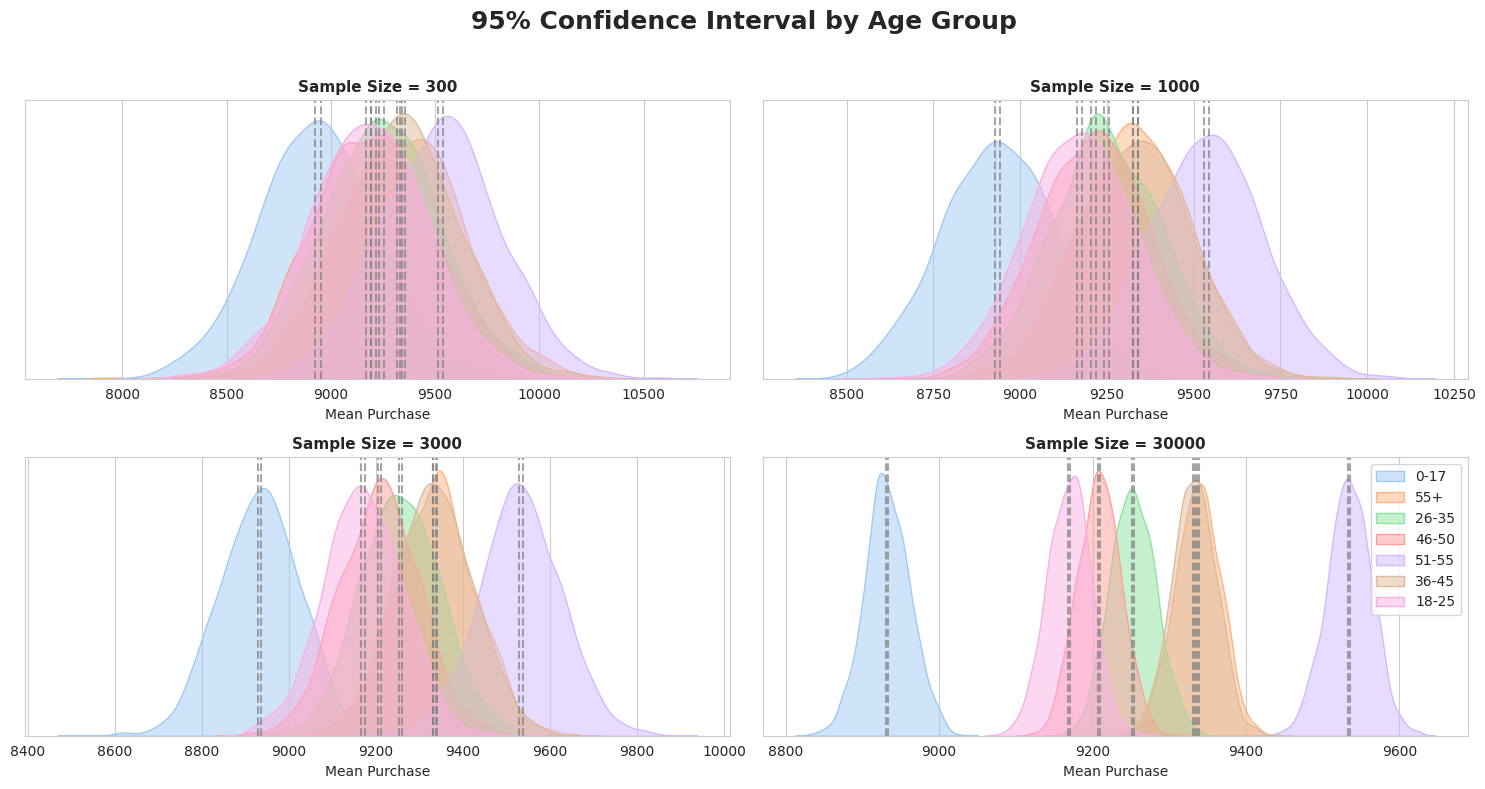

In [ ]:
def confidence_interval(data, ci):
    mean = np.mean(data)
    sem = stats.sem(data)
    t_score = stats.t.ppf((1 + ci / 100) / 2., len(data) - 1)
    margin_of_error = t_score * sem
    return mean - margin_of_error, mean + margin_of_error

# Define the function to plot the visual for age groups
def plot_age_groups(ci):
    fig, axes = plt.subplots(2, 2, figsize=(15, 8))
    axes = axes.flatten()

    # Sample sizes and corresponding plot positions
    sample_sizes = [300, 1000, 3000, 30000]

    # Number of bootstrap samples
    bootstrap_samples = 2000

    # Check for available data for each age group
    for age_group in df['Age'].unique():
        if df[df['Age'] == age_group]['Purchase'].empty:
            raise ValueError(f"No data available for '{age_group}' age group.")

    for ax, size in zip(axes, sample_sizes):
        age_group_means = {age: [] for age in df['Age'].unique()}

        # Bootstrap sampling
        for _ in range(bootstrap_samples):
            for age_group in age_group_means:
                age_data = df[df['Age'] == age_group]['Purchase']
                if len(age_data) > 0:
                    bootstrapped_samples = np.random.choice(age_data, size=size, replace=True)
                    age_group_means[age_group].append(np.mean(bootstrapped_samples))

        # Create DataFrame for plotting
        temp_df = pd.DataFrame(age_group_means)

        # Plot KDE for each age group
        for age_group in age_group_means:
            sns.kdeplot(temp_df[age_group], ax=ax, label=age_group, fill=True, alpha=0.5)

            # Calculate and plot confidence intervals
            ci_range = confidence_interval(age_group_means[age_group], ci)
            ax.axvline(x=ci_range[0], color='gray', linestyle='--', alpha=0.7)
            ax.axvline(x=ci_range[1], color='gray', linestyle='--', alpha=0.7)

        # Adjust plot settings
        ax.set_title(f'Sample Size = {size}', fontsize=11, weight='bold')
        ax.set_yticks([])
        ax.set_ylabel('')
        ax.set_xlabel('Mean Purchase')

    fig.suptitle(f'{ci}% Confidence Interval by Age Group', fontsize=18, weight='bold')
    plt.legend()
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Call the function with a 95% confidence interval
plot_age_groups(95)


The highest average Purchase amount is 9534 by the age group 51-55

The Youngest population Average spend is around 8933 ,9169 etc.



Increase in the sample size decreased the confidence interval giving more precise information.

Lowest spending for the age group-0-17

Highest spending per transactions for the age group :51-55

Similar Spending habits for 55+,26-35,36-45,18-25



**How can Walmart leverage this conclusion to make changes or improvements?**

Target the younger population by offering coupons,discounts etc.

Select the products in demand

# **Final Insights**

**Target Male Population and Female Population**

Male customers account for a significant portion and tend to spend more per transaction on average, Walmart should tailor its marketing strategies and product offerings to male customers while ensuring more focus for female-oriented products.

**Focus on yonger population**

With the age group between 26 and 45 contributing to the majority of sales, Walmart should specifically cater to the preferences and needs of this demographic.

**Engage Younger Population**

Knowing that customers in the 0 - 17 age group have the lowest spending per transaction, Walmart can try to increase their spending per transaction by offering them more attractive discounts, coupons, or rewards programs. It's essential to start building brand loyalty among younger consumers.

**Products**

Company can look at which types of products are popular and on demand with men and women and make sure to stock up these products



